background info

Original paper and data are from Edgar Anderson (1936).  The first analysis of the dataset was in 1936 by Ronald Fisher.  Notice that this well know dataset was first statistically analyzed in the journal Annals of Eugenics. 

References

Anderson, E. (1936). The species problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457-509.

Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.

Online Access to these journal articles

https://ia802305.us.archive.org/1/items/biostor-11559/biostor-11559.pdf

https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x

In [15]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi



# Load the data
df = sns.load_dataset('iris')

# Display the first 5 rows
print(df.head())
print('This work was done by Philip!')


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
This work was done by Philip!


In [16]:
# Initial data analysis
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))
print(df.info())
print(df.isnull().sum())

Rows : 150, column : 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


There are no null values and there are 150 total rows.  Four of the columns are numeric, one is text.  

In [17]:
# Initial data statistics
print(df.groupby('species').median())
print(df.describe())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Mean and median are close to one another, so there are likely not a lot of outliers.

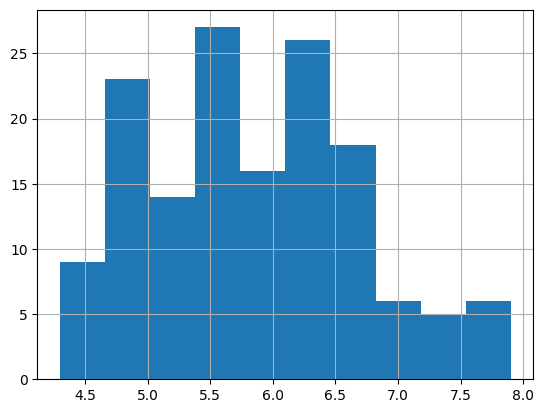

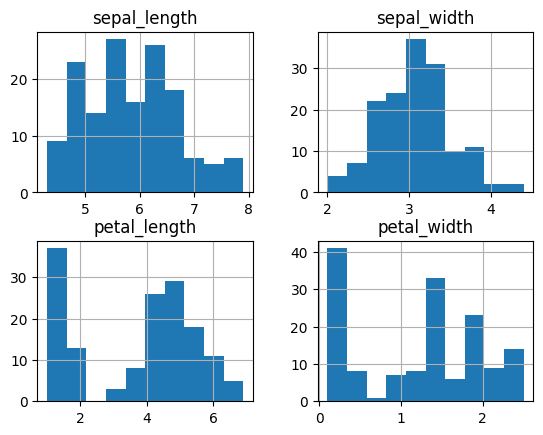

In [18]:
# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

The distribution of petal length and petal width is not normal.  There are certainly differences that likely differ by species.

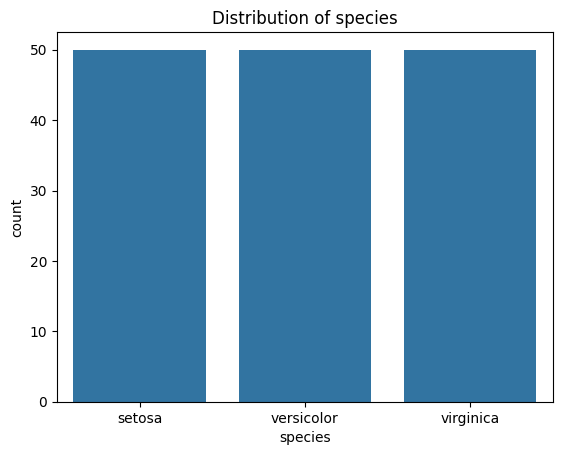

In [19]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

This dataset contains equal numbers of all three species.

<Axes: xlabel='species', ylabel='sepal_width'>

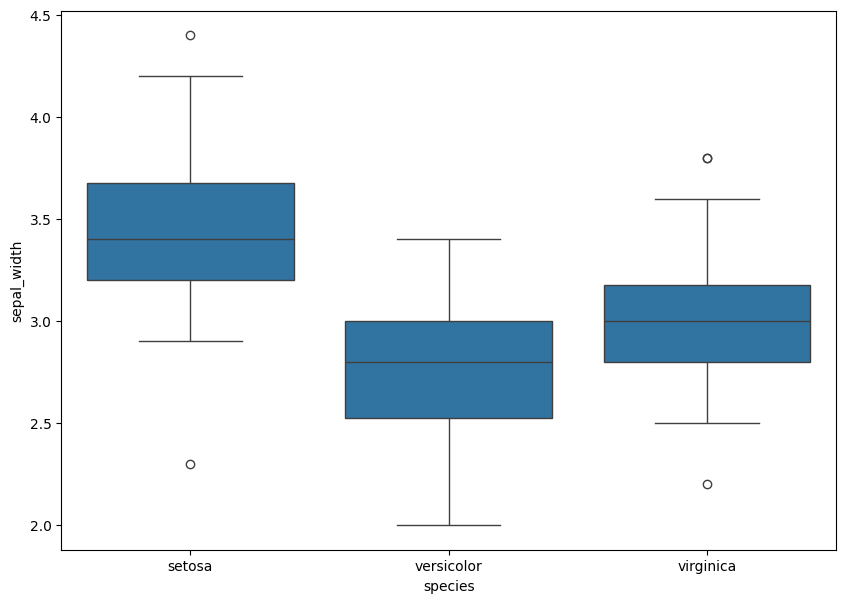

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df)

In [45]:
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width        sepal Area          
                  mean median       mean  median  
species                                           
setosa           0.246    0.2    17.2578  17.170  
versicolor       1.326    1.3    16.5262  16.385  
virginica        2.026    2.0    19.6846  20.060

In [44]:
agg_dict={field: ['min', 'max'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length      sepal_width      petal_length      petal_width  \
                    min  max         min  max          min  max         min   
species                                                                       
setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                sepal Area         
            max        min    max  
species                            
setosa      0.6      10.35  25.08  
versicolor  1.8      10.00  22.40  
virginica   2.5      12.25  30.02

In [43]:
agg_dict={field: ['std', 'var'] for  field in df.columns.tolist() if field != 'species'}
df.groupby('species').agg(agg_dict)

sepal_length           sepal_width           petal_length  \
                    std       var         std       var          std   
species                                                                
setosa         0.352490  0.124249    0.379064  0.143690     0.173664   
versicolor     0.516171  0.266433    0.313798  0.098469     0.469911   
virginica      0.635880  0.404343    0.322497  0.104004     0.551895   

                     petal_width           sepal Area             
                 var         std       var        std        var  
species                                                           
setosa      0.030159    0.105386  0.011106   2.933775   8.607034  
versicolor  0.220816    0.197753  0.039106   2.866882   8.219012  
virginica   0.304588    0.274650  0.075433   3.458783  11.963180

Looking at the box plot and the underlying tables, we can see the differences in the three species.  notice that petal length and petal width differentiate setosa from the other two species.  However, the sepal length, width, and area overlap betwen all three species.  Take-away useful observation here is that petal variables are more definitive for species.

In [23]:
# Renaming a column
#df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
# This was in the specification but it is not necessary and caused me frustration later on so I commented it out

# Adding a new column
df['sepal Area'] = df['sepal_length'] * df['sepal_width']

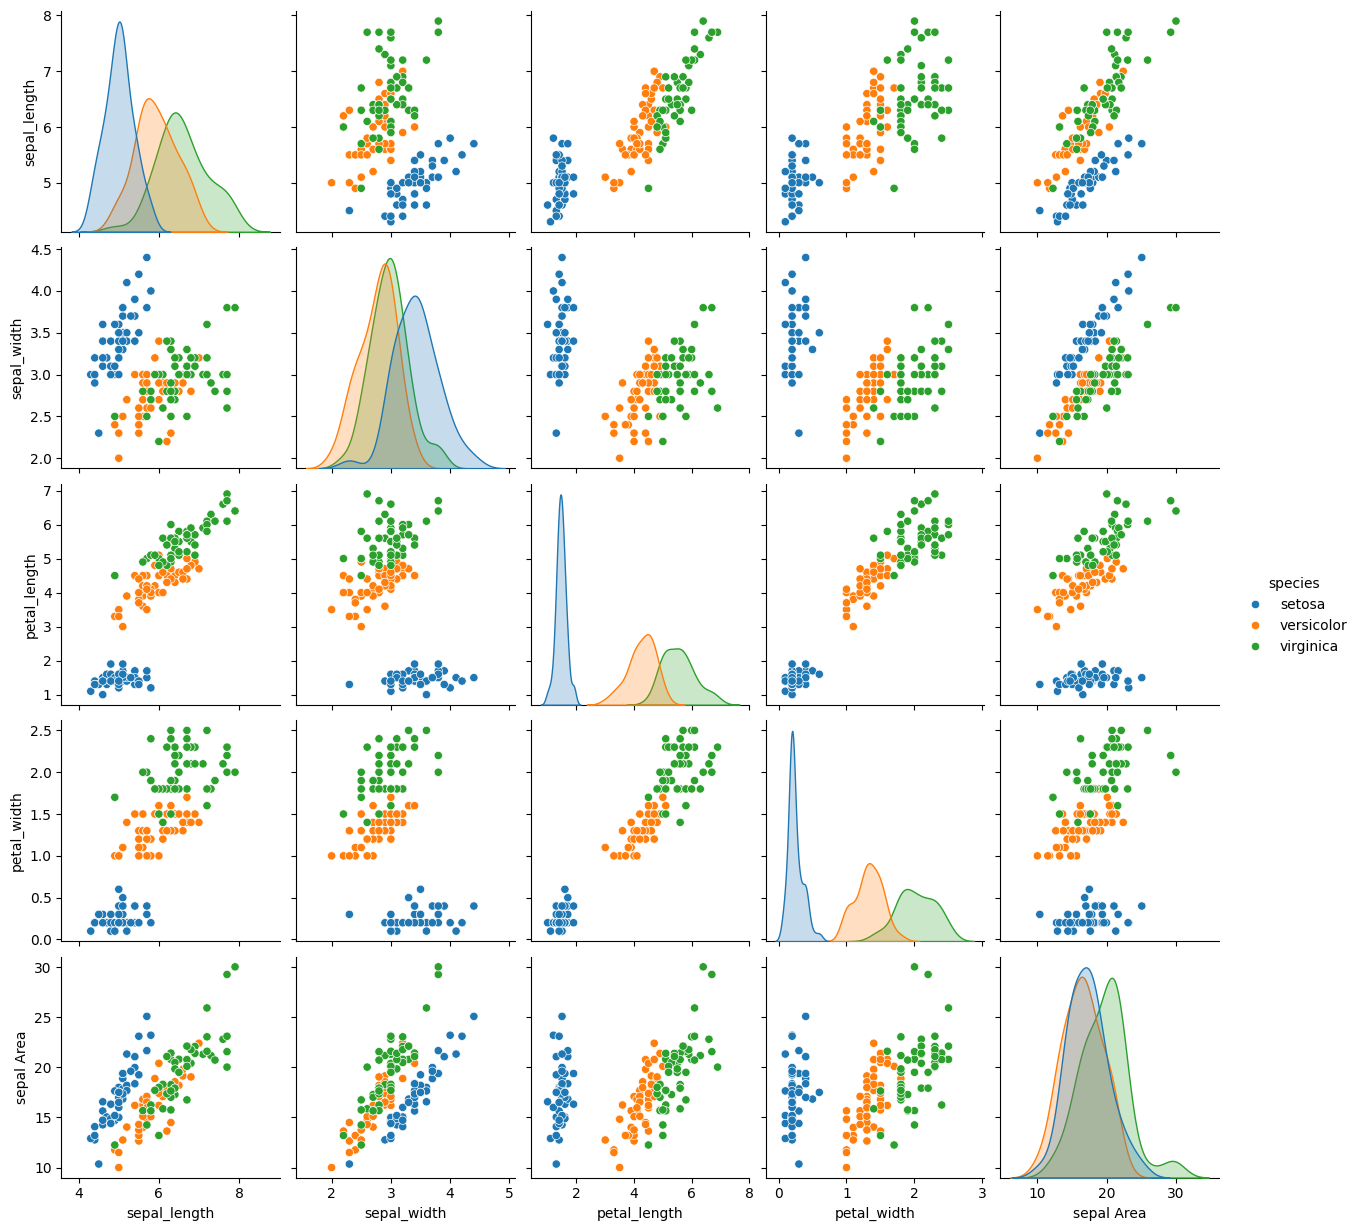

In [24]:
sns.pairplot(df, hue='species')
plt.show()

Visually it looks like sepal width does not correlate as strongly as other variables. Also, setosa seems to be separate from the other two species.  Let's create a larger scatterplot to see this more clearly.

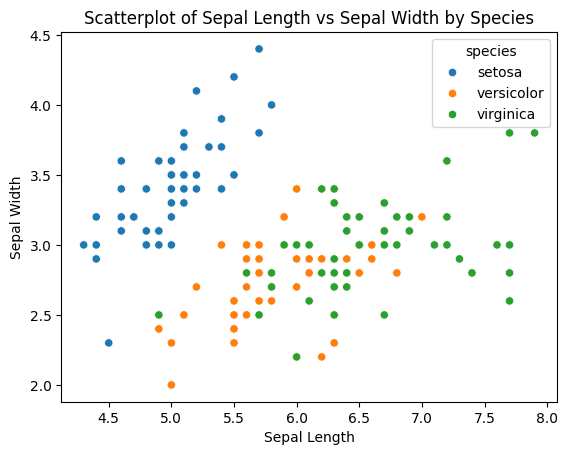

In [25]:
# Create scatterplot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatterplot of Sepal Length vs Sepal Width by Species')

# Display the plot
plt.show()

You can see here that setosa is distinct from versicolor and virginica by sepal length and width.  It is difficult to separate virginica and versicolor by sepal variables.

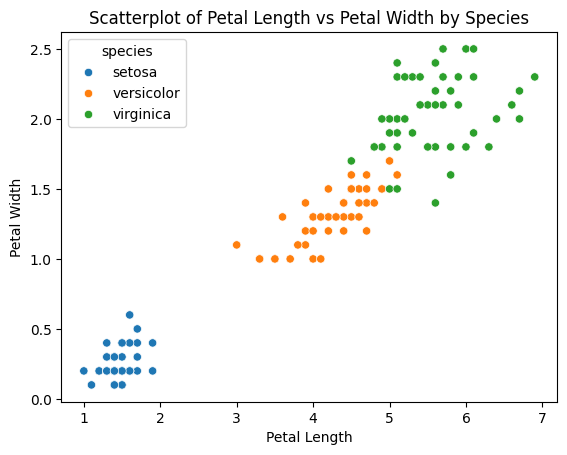

In [26]:
# Create scatterplot
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatterplot of Petal Length vs Petal Width by Species')

# Display the plot
plt.show()

You can see here that while there is some overlap between versicolor and virginica, the three are separate by petal variables.

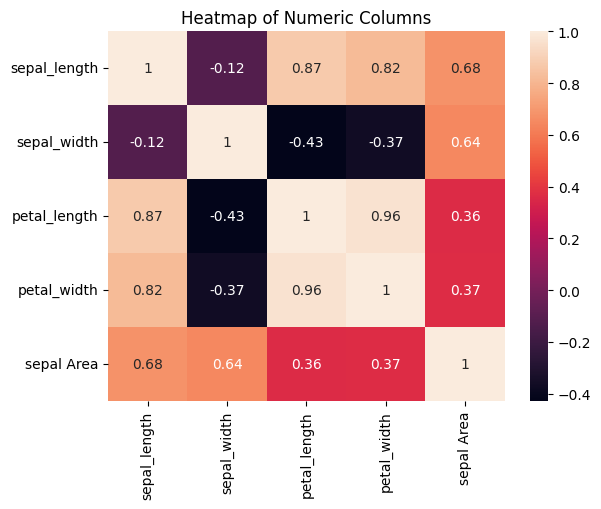

In [42]:
# Let's create a heatmap of the correlation matrix
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Numeric Columns')
plt.show()

Petal variables of length and width have the strongest correlation.  Sepal length correlates strongly with both of the petal variables; however sepal width does not.  Sepal area may be useful; but I really want to know about the shape of the leaf.  Visuals are better here.

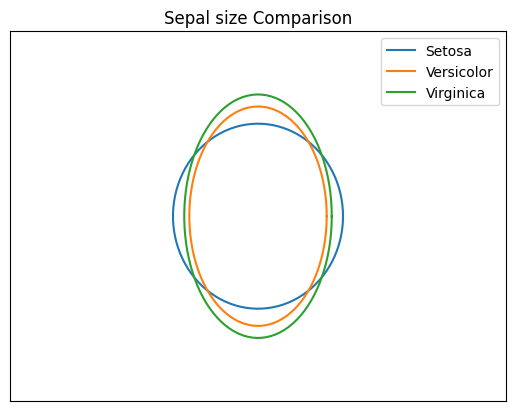

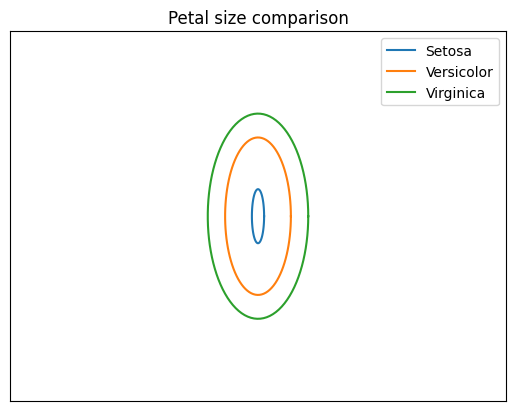

In [40]:
data_setosa = df.loc[df['species'] == 'setosa']
data_virginica = df.loc[df['species'] == 'virginica']
data_versicolor = df.loc[df['species'] == 'versicolor']

u=0     #x-position of the center
v=0   #y-position of the center
t = np.linspace(0, 2*pi, 100)

a=data_setosa['sepal_width'].mean()    #radius on the x-axis
b=data_setosa['sepal_length'].mean()     #radius on the y-axis

leaf_setosa = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Setosa'  ) 


a=data_versicolor['sepal_width'].mean()    #radius on the x-axis
b=data_versicolor['sepal_length'].mean()     #radius on the y-axis
leaf_versicolor = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Versicolor'  ) 

a=data_virginica['sepal_width'].mean()    #radius on the x-axis
b=data_virginica['sepal_length'].mean()     #radius on the y-axis
leaf_virginica = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Virginica'  ) 

plt.xticks([]) 
plt.yticks([]) 
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title('Sepal size Comparison')
plt.legend()
plt.show()

a=data_setosa['petal_width'].mean()    #radius on the x-axis
b=data_setosa['petal_length'].mean()     #radius on the y-axis
leaf_setosa = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Setosa'  ) 

a=data_versicolor['petal_width'].mean()    #radius on the x-axis
b=data_versicolor['petal_length'].mean()     #radius on the y-axis
leaf_versicolor = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Versicolor' ) 

a=data_virginica['petal_width'].mean()    #radius on the x-axis
b=data_virginica['petal_length'].mean()     #radius on the y-axis
leaf_virginica = plt.plot( u+a*np.cos(t) , v+b*np.sin(t), label='Virginica' ) 

plt.title('Petal size comparison')
plt.xticks([]) 
plt.yticks([]) 
plt.legend()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

Notice that the shape of the Setosa Sepals are definitely different from versicolor and virginica.  Setosa is more round than versicolor and virginica.  Petal size in Setosa is also smaller than Versicolor and virginica.